In [35]:
#ใส่ User Agent https://www.whatismybrowser.com/detect/what-is-my-user-agent/#google_vignette

#แก้เพิ่ม issuer column, underlying, row
#เอา DW น้อยกว่า 0.1 บาทออก
head = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'

In [36]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import time
import pandas as pd
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Initialize the Chrome driver
driver = webdriver.Chrome()

# Open the webpage
driver.get("https://www.thaiwarrant.com/dw/search")

# Find the dropdown element by its ID
dropdown = Select(driver.find_element(By.ID,"MainContent_ddIssuer"))

# Select the option by its text
dropdown.select_by_visible_text("- ทั้งหมด -")

search_button = driver.find_element(By.ID, "MainContent_btnSearch1")
search_button.click()

html = driver.page_source
df_list = pd.read_html(html)

df_concatenated = df_list[2]
df_concatenated


,Unnamed: 0,DW ▲▼,ประเภท ▲▼,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,อายุคงเหลือ (วัน) ▲▼
0,NaN,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65
1,NaN,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35
2,NaN,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35
3,NaN,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97
4,NaN,ADVANC13C2410ANew,Call,KGI,0.20,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127
...,...,...,...,...,...,...,...,...,...,...
245,NaN,SCC13C2407A,Call,KGI,0.01,15.25,0.06,OTM / 33.25 %,03 ก.ค. 67,35
246,NaN,SCC13C2408A,Call,KGI,0.04,15.66,0.26,OTM / 24.90 %,06 ส.ค. 67,69
247,NaN,SCC13P2408A,Put,KGI,0.15,9.05,0.57,OTM / 33.51 %,06 ส.ค. 67,69
248,NaN,SCGP13C2406A,Call,KGI,0.01,22.48,0.16,OTM / 16.11 %,05 มิ.ย. 67,7


In [37]:
# Loop through the first five pages
for page_number in range(2, 6):
    time.sleep(5)
    # Click on the respective page link
    link = driver.find_element(By.XPATH, f"//a[contains(@href, '__doPostBack') and text()='{page_number}']")
    driver.execute_script("arguments[0].click();", link)
    time.sleep(5)  # Wait for the page to load, adjust this time as needed
    
    # Get the page source after clicking
    html_after_click = driver.page_source
    
    # Extract the dataframe
    df_list = pd.read_html(html_after_click)
    df_dw132 = df_list[2]  # Assuming the dataframe is at index 2, adjust as needed
    
    # Append the dataframe to the list
    df_concatenated = pd.concat([df_concatenated, df_dw132], ignore_index=True)

driver.quit()
df_concatenated

,Unnamed: 0,DW ▲▼,ประเภท ▲▼,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,อายุคงเหลือ (วัน) ▲▼
0,NaN,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65
1,NaN,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35
2,NaN,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35
3,NaN,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97
4,NaN,ADVANC13C2410ANew,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127
...,...,...,...,...,...,...,...,...,...,...
1062,NaN,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128
1063,NaN,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8
1064,NaN,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8
1065,NaN,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36


In [38]:
#remove new
for i in range(len(df_concatenated)):
    if df_concatenated.iloc[i, 1][-3:] == 'New':
        df_concatenated.iloc[i, 1] = df_concatenated.iloc[i, 1][:-3]

In [39]:
df_concatenated

,Unnamed: 0,DW ▲▼,ประเภท ▲▼,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,อายุคงเหลือ (วัน) ▲▼
0,NaN,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65
1,NaN,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35
2,NaN,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35
3,NaN,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97
4,NaN,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127
...,...,...,...,...,...,...,...,...,...,...
1062,NaN,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128
1063,NaN,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8
1064,NaN,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8
1065,NaN,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36


In [40]:
df_concatenated = df_concatenated.rename(columns={
    df_concatenated.columns[0]: 'Unname',
    df_concatenated.columns[1]: 'DW',
    df_concatenated.columns[2]: 'Type',
    df_concatenated.columns[9]: 'TTM(days)'
})

In [41]:
df_concatenated

,Unname,DW,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,TTM(days)
0,NaN,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65
1,NaN,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35
2,NaN,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35
3,NaN,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97
4,NaN,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127
...,...,...,...,...,...,...,...,...,...,...
1062,NaN,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128
1063,NaN,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8
1064,NaN,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8
1065,NaN,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36


In [42]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

imp_vol = []
s_list = []
ratio_list = []
k_list = []
for i in range(len(df_concatenated)):
    print(i)
    volatility = 0
    dw = df_concatenated['DW'][i]
    url = "https://www.thaiwarrant.com/dw/" + dw
    response = requests.get(url, verify=False, headers={'User-Agent': head}).content

    soup = BeautifulSoup(response, 'html.parser')
    inner_text = soup.get_text()

    match = re.search(r"Volatility \(%\) :\s*([\d.]+)", inner_text)
    if match:
        volatility = match.group(1)
    else:
        volatility = 'NaN'
    imp_vol.append(volatility)

    match = re.search(r"ราคาหุ้น .+? \(บาท\) / \(% เปลี่ยนแปลง\) :\s*(\d+\.\d+)", inner_text)
    if match:
        s = match.group(1)
    else:
        s = 'NaN'
    s_list.append(s)

    match = re.search(r"อัตราใช้สิทธิ \(DW: 1 หลักทรัพย์อ้างอิง\) :\s*(\d+\.\d+)", inner_text)
    if match:
        r = match.group(1)
    else:
        r = 'NaN'
    ratio_list.append(r)

    match = re.search(r"ราคาใช้สิทธิ\s*\(บาท\) : (\d+\.\d+)", inner_text)
    if match:
        k = match.group(1)
    else:
        k = 'NaN'
    k_list.append(k)

df_concatenated['Imp Vol.'] = np.array(imp_vol)
df_concatenated['S'] = np.array(s_list)
df_concatenated['ratio'] = np.array(ratio_list)
df_concatenated['K'] = np.array(k_list)
#df_concatenated

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [43]:
#dropna
df_concatenated = df_concatenated[
    (df_concatenated['Imp Vol.'] != 'NaN') &
    (df_concatenated['S'] != 'NaN') &
    (df_concatenated['ratio'] != 'NaN') &
    (df_concatenated['K'] != 'NaN')
].reset_index(drop=True)
df_concatenated = df_concatenated.drop(columns=['Unname'],axis=1)
# Convert columns from string to float
df_concatenated['Imp Vol.'] = df_concatenated['Imp Vol.'].astype(float)
df_concatenated['S'] = df_concatenated['S'].astype(float)
df_concatenated['ratio'] = df_concatenated['ratio'].astype(float)
df_concatenated['K'] = df_concatenated['K'].astype(float)

df_concatenated

,DW,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,TTM(days),Imp Vol.,S,ratio,K
0,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65,60.0,2.24,0.70000,3.200
1,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35,82.0,1.38,0.45000,2.120
2,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35,49.0,204.00,25.00000,265.000
3,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97,40.0,204.00,27.50275,260.000
4,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127,38.0,204.00,26.00104,252.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128,56.0,5.40,2.35001,6.450
1055,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8,59.0,5.40,0.46888,5.910
1056,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8,60.0,5.40,0.51772,6.008
1057,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36,58.0,5.40,0.68378,5.861


In [44]:
#risk free
from tvDatafeed import TvDatafeed, Interval
tv = TvDatafeed()
rf = tv.get_hist(symbol='ECONOMICS:THINTR', exchange='Central Bank',interval=Interval.in_monthly,n_bars=2)
rrf = rf['close'][-1]
rrf = rrf/100

In [45]:
rrf

0.025

In [46]:
#Black Scholes Template

from scipy.stats import norm
import numpy as np
cp_real = []
for i in range(len(df_concatenated)):
    d1 = (np.log(df_concatenated['S'][i]/df_concatenated['K'][i])+((rrf+(((df_concatenated['Imp Vol.'][i]/100)**2)/2))*(df_concatenated['TTM(days)'][i]/365)))/((df_concatenated['Imp Vol.'][i]/100)*np.sqrt(df_concatenated['TTM(days)'][i]/365))
    d2 = d1 - ((df_concatenated['Imp Vol.'][i]/100)*np.sqrt(df_concatenated['TTM(days)'][i]/365))
    if df_concatenated['Type'][i] == 'Call':
        y = (df_concatenated['S'][i] * norm.cdf(d1,0,1)) - (df_concatenated['K'][i] * np.exp(-rrf * (df_concatenated['TTM(days)'][i]/365)) * norm.cdf(d2,0,1))
    elif df_concatenated['Type'][i] == 'Put':
        y = (df_concatenated['K'][i] * np.exp(-rrf * (df_concatenated['TTM(days)'][i]/365)) * norm.cdf(-d2,0,1)) - (df_concatenated['S'][i] * norm.cdf(-d1,0,1))
    y = y / df_concatenated['ratio'][i]
    cp_real.append(y)
df_concatenated['CPREAL'] = np.array(cp_real)
df_concatenated['Underlying'] = 'SET:' + df_concatenated['DW'].apply(lambda x: x[:-8])
df_concatenated

,DW,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,TTM(days),Imp Vol.,S,ratio,K,CPREAL,Underlying
0,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65,60.0,2.24,0.70000,3.200,0.035928,SET:AAV
1,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35,82.0,1.38,0.45000,2.120,0.018335,SET:ACE
2,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35,49.0,204.00,25.00000,265.000,0.025203,SET:ADVANC
3,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97,40.0,204.00,27.50275,260.000,0.107778,SET:ADVANC
4,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127,38.0,204.00,26.00104,252.000,0.193312,SET:ADVANC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128,56.0,5.40,2.35001,6.450,0.160495,SET:WHA
1055,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8,59.0,5.40,0.46888,5.910,0.083204,SET:WHA
1056,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8,60.0,5.40,0.51772,6.008,0.055346,SET:WHA
1057,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36,58.0,5.40,0.68378,5.861,0.325943,SET:WHA


Vol Forecasting

In [47]:
underlying_data = df_concatenated['DW'].apply(lambda x: x[:-8])

# Create new DataFrame 'df_underlying' with column 'Stock'
df_underlying = pd.DataFrame({'Stock': underlying_data})

# Get unique values from the 'Stock' column
unique_df_underlying = df_underlying['Stock'].unique()

# Create a new DataFrame with unique values
unique_df = pd.DataFrame({'Stock': unique_df_underlying})

unique_df['Stock'] = 'SET:' + unique_df['Stock']
unique_df

,Stock
0,SET:AAV
1,SET:ACE
2,SET:ADVANC
3,SET:AEONTS
4,SET:AMATA
...,...
99,SET:VGI
100,SET:WHA
101,SET:BCPG
102,SET:MEGA


In [48]:
tv = TvDatafeed()
df = tv.get_hist(symbol='SET:SET50', exchange='SET', interval=Interval.in_daily, n_bars=1201)
df_und = df[['close']]
df_und.rename(columns = {'close':'remove'}, inplace=True)

for i in range(len(unique_df)):
    try:
        df = tv.get_hist(symbol=unique_df['Stock'][i], exchange='SET', interval=Interval.in_daily, n_bars=1201)
        df = df[['close']]
        df_und = pd.merge(df_und, df, left_index=True, right_index=True, how='outer')
        df_und.rename(columns = {'close':unique_df['Stock'][i]}, inplace=True)
    except:
        df = tv.get_hist(symbol=unique_df['Stock'][i], exchange='SET', interval=Interval.in_daily, n_bars=1201)
        df = df[['close']]
        df_und = pd.merge(df_und, df, left_index=True, right_index=True, how='outer')
        df_und.rename(columns = {'close':unique_df['Stock'][i]}, inplace=True)
df_und = df_und.drop('remove',axis=1)

In [49]:
returns = np.log(df_und).diff()*100
from arch import arch_model
volatility_list = []
for i in range (len(df_concatenated)):
    returns_each = returns[[df_concatenated['Underlying'][i]]].dropna()
    model = arch_model(returns_each,vol="Garch", p=1,q=1).fit(disp='off')
    forecast = model.forecast(horizon = df_concatenated['TTM(days)'][i], method = 'analytic', reindex=True)

    y = forecast.variance.values[-1,:].flatten()
    df_y = pd.DataFrame(y)
    df_y.rename(columns={df_y.columns[0]:'forecast'},inplace=True)
    df_y['forecast'] = np.sqrt(df_y['forecast']) * np.sqrt(250)
    vol = float(df_y['forecast'].tail(1))
    volatility_list.append(vol)
df_concatenated['Forecasted Vol.'] = np.array(volatility_list)
df_concatenated

,DW,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,TTM(days),Imp Vol.,S,ratio,K,CPREAL,Underlying,Forecasted Vol.
0,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65,60.0,2.24,0.70000,3.200,0.035928,SET:AAV,40.066097
1,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35,82.0,1.38,0.45000,2.120,0.018335,SET:ACE,25.232275
2,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35,49.0,204.00,25.00000,265.000,0.025203,SET:ADVANC,20.023273
3,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97,40.0,204.00,27.50275,260.000,0.107778,SET:ADVANC,20.508386
4,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127,38.0,204.00,26.00104,252.000,0.193312,SET:ADVANC,20.521595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128,56.0,5.40,2.35001,6.450,0.160495,SET:WHA,31.917897
1055,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8,59.0,5.40,0.46888,5.910,0.083204,SET:WHA,27.542105
1056,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8,60.0,5.40,0.51772,6.008,0.055346,SET:WHA,27.542105
1057,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36,58.0,5.40,0.68378,5.861,0.325943,SET:WHA,29.261186


In [50]:
hist_vol_list = []
for i in range(len(df_concatenated)):
    returns_each = returns[[df_concatenated['Underlying'][i]]].dropna()
    ttm_days = df_concatenated['TTM(days)'][i]
    ttm_days = int(ttm_days)
    if len(returns_each) >= ttm_days:
        hist_vol = returns_each[-ttm_days:].std()
    else:
        # Handle case where not enough data points are available
        hist_vol = returns_each.std()
        print('not enough datapoint for', df_concatenated['Underlying'][i], df_concatenated['TTM(days)'][i] )
    hist_vol = hist_vol * np.sqrt(250)
    hist_vol_list.append(hist_vol)
df_concatenated['Historical Vol.'] = np.array(hist_vol_list)
df_concatenated

,DW,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),อัตราทด (เท่า) ▲▼,อัตราทด (Tick) ▲▼,Moneyness,วันซื้อขาย วันสุดท้าย,TTM(days),Imp Vol.,S,ratio,K,CPREAL,Underlying,Forecasted Vol.,Historical Vol.
0,AAV13C2408A,Call,KGI,0.04,8.50,0.30,OTM / 30.00 %,02 ส.ค. 67,65,60.0,2.24,0.70000,3.200,0.035928,SET:AAV,40.066097,33.607142
1,ACE13C2407A,Call,KGI,0.01,11.21,0.08,OTM / 34.91 %,03 ก.ค. 67,35,82.0,1.38,0.45000,2.120,0.018335,SET:ACE,25.232275,15.558116
2,ADVANC13C2407A,Call,KGI,0.01,19.07,0.09,OTM / 23.02 %,03 ก.ค. 67,35,49.0,204.00,25.00000,265.000,0.025203,SET:ADVANC,20.023273,18.425187
3,ADVANC13C2409A,Call,KGI,0.12,9.50,0.56,OTM / 21.54 %,03 ก.ย. 67,97,40.0,204.00,27.50275,260.000,0.107778,SET:ADVANC,20.508386,17.280179
4,ADVANC13C2410A,Call,KGI,0.2,8.89,0.87,OTM / 19.05 %,03 ต.ค. 67,127,38.0,204.00,26.00104,252.000,0.193312,SET:ADVANC,20.521595,15.675276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,WHA19C2410A,Call,YUANTA,0.17,5.01,0.79,OTM / 16.28 %,04 ต.ค. 67,128,56.0,5.40,2.35001,6.450,0.160495,SET:WHA,31.917897,25.022198
1055,WHA41C2406A,Call,JPM,0.09,21.20,1.77,OTM / 8.63 %,06 มิ.ย. 67,8,59.0,5.40,0.46888,5.910,0.083204,SET:WHA,27.542105,14.365520
1056,WHA41C2406B,Call,JPM,0.06,22.09,1.23,OTM / 10.12 %,06 มิ.ย. 67,8,60.0,5.40,0.51772,6.008,0.055346,SET:WHA,27.542105,14.365520
1057,WHA41C2407A,Call,JPM,0.34,8.54,2.69,OTM / 7.87 %,04 ก.ค. 67,36,58.0,5.40,0.68378,5.861,0.325943,SET:WHA,29.261186,25.711671


In [51]:
for i in range(len(df_concatenated)):
    print(df_concatenated['ราคา DW อ้างอิง (บาท)'][i])

0.04
0.01
0.01
0.12
0.2
0.11
0.22
0.01
0.41
0.06
0.2
0.01
0.16
0.07
0.11
0.28
0.46
0.37
0.17
0.05
0.01
0.01
0.11
0.19
0.01
0.11
0.1
0.01
0.05
0.22
0.01
0.11
0.33
0.06
0.04
0.02
0.01
0.01
0.11
0.48
0.01
0.22
0.23
0.01
0.26
0.13
0.4
0.02
0.01
0.12
0.12
0.02
0.01
0.14
0.01
0.05
0.29
0.31
0.1
0.48
0.02
0.2
0.01
0.06
0.19
0.01
0.11
0.27
0.01
0.02
0.1
0.28
0.11
0.4
0.07
0.13
0.16
0.07
0.51
0.29
0.68
0.41
0.36
0.01
0.11
0.01
0.03
0.1
0.04
0.19
0.12
0.47
0.04
0.32
0.69
0.04
0.03
0.23
0.01
0.01
0.01
0.01
0.01
0.04
0.08
0.41
1.03
0.67
0.42
0.02
0.35
0.01
0.03
0.11
0.01
0.25
0.01
0.26
0.01
0.13
0.26
0.03
0.36
0.01
0.04
0.17
0.14
0.01
0.03
0.19
0.01
0.02
0.13
0.13
0.24
0.01
0.09
0.02
0.12
0.45
0.01
0.2
0.08
0.04
0.01
0.39
0.01
0.01
0.11
0.03
0.1
0.36
0.24
0.01
0.1
0.24
0.34
0.01
0.01
0.04
0.22
0.33
0.2
0.54
0.01
0.19
0.36
0.2
0.01
0.07
0.34
0.01
0.01
0.04
0.15
0.35
0.09
0.04
0.43
0.14
0.01
0.01
0.21
0.01
0.07
0.05
0.25
0.01
0.09
0.01
0.02
0.12
0.01
0.01
0.01
0.23
0.01
0.16
0.01
0.01
0.04
0.01
0.12

In [52]:
new_order = [
    'DW', 'Underlying', 'Type', 'ผู้ออก', 'ราคา DW อ้างอิง (บาท)', 'Imp Vol.', 
    'Historical Vol.', 'Forecasted Vol.', 'S', 'K', 'TTM(days)', 'ratio', 
    'วันซื้อขาย วันสุดท้าย'
]
df = df_concatenated.reindex(columns=new_order)
df['ราคา DW อ้างอิง (บาท)'] = df['ราคา DW อ้างอิง (บาท)'].astype(float)
df = df[df['ราคา DW อ้างอิง (บาท)'] >= 0.1]

In [53]:
#เทียบ Buffer ของ implied and historical, implied and forecasted, เทียบ Buffer ของแต่ละ Issuer
df['Imp.-Hist.'] = df['Imp Vol.'] - df['Historical Vol.']
df['Imp.-Forecasted.'] = df['Imp Vol.'] - df['Forecasted Vol.']
df['Over/Under'] = np.where(df['Imp.-Forecasted.'] < 0, 'U', 'O')
df

,DW,Underlying,Type,ผู้ออก,ราคา DW อ้างอิง (บาท),Imp Vol.,Historical Vol.,Forecasted Vol.,S,K,TTM(days),ratio,วันซื้อขาย วันสุดท้าย,Imp.-Hist.,Imp.-Forecasted.,Over/Under
3,ADVANC13C2409A,SET:ADVANC,Call,KGI,0.12,40.0,17.280179,20.508386,204.0,260.000,97,27.50275,03 ก.ย. 67,22.719821,19.491614,O
4,ADVANC13C2410A,SET:ADVANC,Call,KGI,0.20,38.0,15.675276,20.521595,204.0,252.000,127,26.00104,03 ต.ค. 67,22.324724,17.478405,O
5,ADVANC13P2408A,SET:ADVANC,Put,KGI,0.11,49.0,18.426880,20.429460,204.0,154.000,65,13.99972,02 ส.ค. 67,30.573120,28.570540,O
6,AEONTS13C2408A,SET:AEONTS,Call,KGI,0.22,63.0,25.472441,35.400978,151.0,198.168,69,19.13143,06 ส.ค. 67,37.527559,27.599022,O
8,AMATA13C2410A,SET:AMATA,Call,KGI,0.41,53.0,28.325413,34.227388,23.6,29.000,127,3.50005,03 ต.ค. 67,24.674587,18.772612,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,WHA11C2407A,SET:WHA,Call,KS,0.46,58.0,22.699592,29.815069,5.4,5.812,48,0.68378,16 ก.ค. 67,35.300408,28.184931,O
1053,WHA19C2406A,SET:WHA,Call,YUANTA,0.10,65.0,28.696408,27.616204,5.4,6.008,9,0.48841,07 มิ.ย. 67,36.303592,37.383796,O
1054,WHA19C2410A,SET:WHA,Call,YUANTA,0.17,56.0,25.022198,31.917897,5.4,6.450,128,2.35001,04 ต.ค. 67,30.977802,24.082103,O
1057,WHA41C2407A,SET:WHA,Call,JPM,0.34,58.0,25.711671,29.261186,5.4,5.861,36,0.68378,04 ก.ค. 67,32.288329,28.738814,O


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

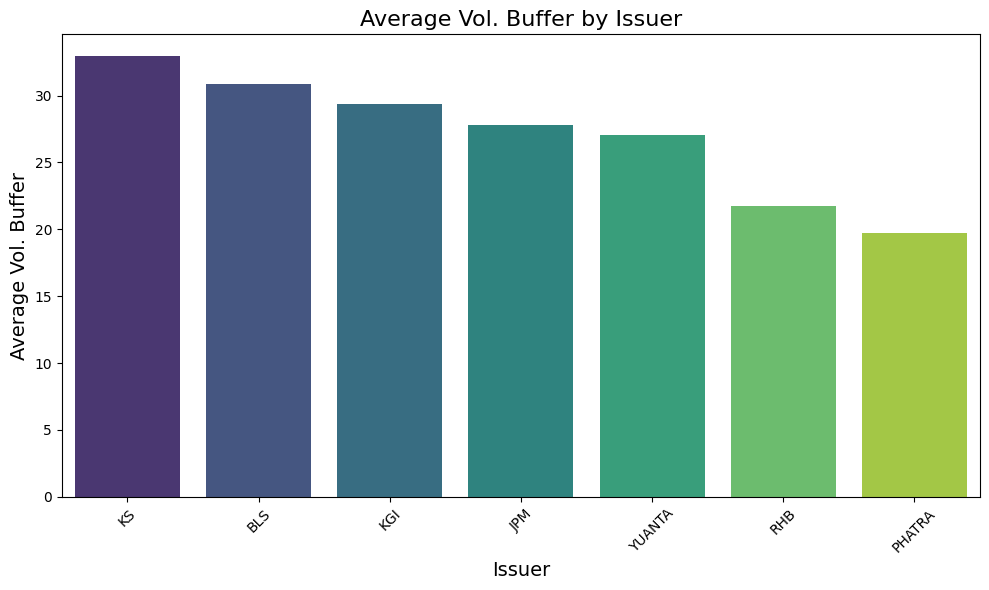

In [55]:
Issuer_buffer = df.groupby('ผู้ออก')['Imp.-Hist.'].mean().reset_index()

# Rename columns for clarity
Issuer_buffer.columns = ['Issuer', 'avg Vol. Buffer']
Issuer_buffer = Issuer_buffer.sort_values(by='avg Vol. Buffer', ascending=False)
Issuer_buffer

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=Issuer_buffer, x='Issuer', y='avg Vol. Buffer', palette='viridis')

# Adding titles and labels
plt.title('Average Vol. Buffer by Issuer', fontsize=16)
plt.xlabel('Issuer', fontsize=14)
plt.ylabel('Average Vol. Buffer', fontsize=14)

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [56]:
Underlying_buffer = df.groupby('Underlying')['Imp.-Hist.'].mean().reset_index()
# Rename columns for clarity
Underlying_buffer.columns = ['Underlying', 'avg Vol. Buffer']
Underlying_buffer = Underlying_buffer.sort_values(by='avg Vol. Buffer', ascending=False)
Underlying_buffer

,Underlying,avg Vol. Buffer
61,SET:PTG,100.960681
36,SET:GUNKUL,51.344765
44,SET:JMART,46.138033
59,SET:PLANB,44.579152
45,SET:JMT,41.516254
...,...,...
69,SET:SCB,21.413319
26,SET:CRC,20.912989
71,SET:SCGP,19.950976
76,SET:STA,11.950121


In [57]:
Type_buffer = df.groupby('Type')['Imp.-Hist.'].mean().reset_index()
# Rename columns for clarity
Type_buffer.columns = ['Type', 'avg Vol. Buffer']
Type_buffer = Type_buffer.sort_values(by='avg Vol. Buffer', ascending=False)
Type_buffer

,Type,avg Vol. Buffer
1,Put,37.430637
0,Call,26.970028


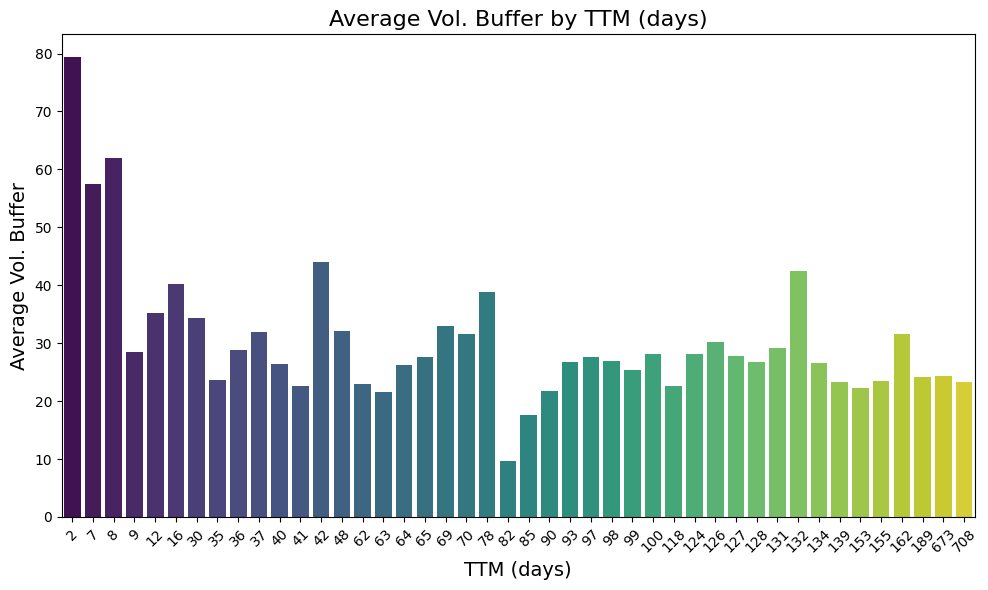

In [58]:
TTM_buffer = df.groupby('TTM(days)')['Imp.-Hist.'].mean().reset_index()
# Rename columns for clarity
TTM_buffer.columns = ['TTM(days)', 'avg Vol. Buffer']
TTM_buffer = TTM_buffer.sort_values(by='avg Vol. Buffer', ascending=False)
TTM_buffer

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=TTM_buffer, x='TTM(days)', y='avg Vol. Buffer', palette='viridis')

# Adding titles and labels
plt.title('Average Vol. Buffer by TTM (days)', fontsize=16)
plt.xlabel('TTM (days)', fontsize=14)
plt.ylabel('Average Vol. Buffer', fontsize=14)

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
Over_under = df[['DW','Imp.-Forecasted.','Over/Under']]
Over_under = Over_under.sort_values(by='Imp.-Forecasted.', ascending=True)
Over_under

,DW,Imp.-Forecasted.,Over/Under
857,PTTEP41C2604T,-4.701007,U
53,BYD13C2410A,-4.379936,U
914,SCB41C2408A,-3.796998,U
910,SCB19C2409A,-3.696350,U
948,STA06C2408A,-2.909362,U
...,...,...,...
79,CPF13C2406A,53.016758,O
955,STGT01C2407A,53.076126,O
1020,TRUE41C2406B,55.846178,O
834,PTG11C2405A,100.008265,O


In [60]:
pivot_df = df.pivot_table(index='Underlying', columns='ผู้ออก', values='Imp.-Hist.', aggfunc='mean')

# If you want to ensure the order of columns is as per unique values of 'ผู้ออก'
pivot_df = pivot_df.reindex(sorted(pivot_df.columns), axis=1)

# If you want to ensure the order of rows is as per unique values of 'Underlying'
pivot_df = pivot_df.reindex(sorted(pivot_df.index))

pivot_df

ผู้ออก,BLS,JPM,KGI,KS,PHATRA,RHB,YUANTA
Underlying,,,,,,,
SET:ADVANC,26.558952,24.410305,25.205889,NaN,21.680839,NaN,22.889083
SET:AEONTS,38.220154,NaN,37.527559,NaN,NaN,NaN,NaN
SET:AMATA,33.483512,29.712362,24.674587,31.143920,NaN,NaN,31.483512
SET:AOT,24.555154,20.274525,25.286912,NaN,NaN,21.766014,17.963450
SET:AWC,24.395198,24.175574,26.312958,23.737267,NaN,NaN,22.232769
...,...,...,...,...,...,...,...
SET:TRUE,29.703359,49.228338,33.173762,46.608042,25.156965,NaN,26.919028
SET:TTB,24.778644,NaN,25.203381,NaN,NaN,NaN,24.778644
SET:TU,32.445110,29.007200,NaN,NaN,NaN,NaN,NaN


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming your DataFrames are defined as follows:
# df, Issuer_buffer, Underlying_buffer, TTM_buffer, Over_under

# Create a dictionary of DataFrames with their names
dataframes = {
    'df': df,
    'Issuer_buffer': Issuer_buffer,
    'Underlying_buffer': Underlying_buffer,
    'TTM_buffer': TTM_buffer,
    'Over_under': Over_under,
    'pivot_df': pivot_df
}

# Get today's date in the format yyyy-mm-dd
today_date = datetime.today().strftime('%Y-%m-%d')

# Specify the output file name with today's date
output_file = f'DW Vol._{today_date}.xlsx'

# Use ExcelWriter to save each DataFrame to a separate worksheet
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for sheet_name, dataframe in dataframes.items():
        if sheet_name == 'pivot_df':
            dataframe.to_excel(writer, sheet_name=sheet_name, index=True)
            
            # Apply conditional formatting to pivot_df
            worksheet = writer.sheets[sheet_name]
            (max_row, max_col) = dataframe.shape
            worksheet.conditional_format(1, 1, max_row, max_col,
                                         {'type': '3_color_scale',
                                          'min_color': '#63BE7B',
                                          'mid_color': '#FFFFFF',
                                          'max_color': '#F8696B'})
        else:
            dataframe.to_excel(writer, sheet_name=sheet_name, index=False)

print(f'DataFrames and plot have been saved to {output_file}')

DataFrames and plot have been saved to DW Vol._2024-05-30.xlsx
